<a href="https://colab.research.google.com/github/mohamedseklani/Group-A-DLI-Assignment/blob/main/M_seklani(NB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NB PAPER PROVMENT**

This code cell imports essential Python libraries for data processing and sets random seeds for reproducibility. It imports os for operating system interactions (like creating directories and removing files), numpy (as np) for numerical operations, pandas (as pd) for data manipulation and analysis using DataFrames, and random for generating pseudo-random numbers. The lines random.seed(10) and np.random.seed(10) are included to set the random seeds for the random and numpy libraries, respectively, guaranteeing that any random operations performed in the code will produce the same sequence of results each time the cell is executed.

In [ ]:
# import the packages to be used
import os       # to create directories and remove files
import numpy as np
import pandas as pd
import random

# set the random seed to ensure the result is reproducible
random.seed(10)
np.random.seed(10)

Unzips any .zip files in Dataset/LUFlow/2020/07, merges all CSVs there into Dataset/dataset_combined/LUFlow_2020_07.csv (skips duplicate headers; optional downsampling), then loads that merged CSV into a pandas DataFrame df and prints its shape and first rows.

In [ ]:
# ==========================================
# 2. Unzip all csv files
# ==========================================
import os, zipfile, random, pandas as pd

zip_folder = "Dataset/LUFlow/2020/07"
extract_folder = zip_folder

for zip_file in os.listdir(zip_folder):
    if zip_file.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(zip_folder, zip_file), 'r') as z:
            z.extractall(extract_folder)

print("✅ All files extracted!")

# ==========================================
# 3. Combine all csv files into one
# ==========================================
def combine_csv_files(dataset_folder: str, reduce_sample_size: bool = False):
    combined_path = f"Dataset/dataset_combined/LUFlow_2020_07.csv"
    os.makedirs("Dataset/dataset_combined", exist_ok=True)

    # Remove old file if exists
    if os.path.isfile(combined_path):
        os.remove(combined_path)

    for i, file in enumerate(sorted(os.listdir(dataset_folder))):
        if not file.endswith(".csv"):
            continue
        with open(os.path.join(dataset_folder, file), "r") as infile, open(combined_path, "a") as outfile:
            for j, line in enumerate(infile):
                if 'Label' in line or 'label' in line:  # header
                    if i != 0 or j != 0:
                        continue
                elif reduce_sample_size and random.randint(1, 10) > 1:
                    continue
                outfile.write(line.replace(' ï¿½ ', '-'))

    print(f"✅ Combined CSV saved to {combined_path}")
    return combined_path

combined_csv = combine_csv_files("Dataset/LUFlow/2020/07")

# ==========================================
# 4. Load into pandas
# ==========================================
df = pd.read_csv(combined_csv)
print("Dataset shape:", df.shape)
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/LUFlow/2020/07'

# Step 2. Preliminary analysis

In [ ]:
# read the dataset
luflow2020 = pd.read_csv('/content/Dataset/dataset_combined/LUFlow_2020_07.csv')
luflow2020.head()

In [ ]:
print(f"Number of rows: {luflow2020.shape[0]}")
print(f"Number of columns: {luflow2020.shape[1]}")

In [ ]:
print("Columns in the dataset:")
luflow2020.columns

In [ ]:
print('Class distribution:')
luflow2020['label'].value_counts()

In [ ]:
print('Class distribution (normalized):')
luflow2020['label'].value_counts()/luflow2020.shape[0]*100

Check for null value

In [ ]:
luflow2020_null_count = luflow2020.isnull().sum()
luflow2020_null_count = luflow2020_null_count[luflow2020_null_count > 0]
print(f"Rows contain null value: \n{luflow2020_null_count}\n")

luflow2020_null_count = luflow2020_null_count / luflow2020.shape[0] * 100
print(f"Rows contain null value (percentage): \n{luflow2020_null_count}\n")

Check for infinity value

In [ ]:
print('Number of samples contains infinity value:')
np.isinf(luflow2020.iloc[:, :-2]).any(axis=1).sum()

Check for columns that contain string values

In [ ]:
luflow2020.info()

Check for duplicates

In [ ]:
# check for duplicated column
luflow2020.columns[luflow2020.columns.value_counts() > 1]

In [ ]:
luflow_duplicates = luflow2020[luflow2020.duplicated()]
print(f"{luflow_duplicates.shape[0]} rows are duplicates")
print(f"{luflow_duplicates.shape[0]/luflow2020.shape[0]*100:.2f}% of rows are duplicates")

Step 3. Dataset cleaning

In [ ]:
# remove rows contain missing value
luflow2020 = luflow2020.dropna(how='any')
luflow2020.shape

In [ ]:
luflow2020 = luflow2020.drop_duplicates()
luflow2020.shape

Step 4. Dataset preparation

In [ ]:
attack = luflow2020[luflow2020['label']=='malicious']
benign = luflow2020[luflow2020['label']=='benign'].sample(n=len(attack)).reset_index(drop=True)

luflow2020_exclude_outlier = pd.concat([attack, benign])
del attack
del benign

luflow2020_exclude_outlier['label'].value_counts()

Step 5. Save the dataset

In [ ]:
# function to save the cleaned dataset
def save_cleaned_dataset(dataframe: pd.DataFrame,dataset: str, tag: str = ""):
    # create a new directory to save the cleaned dataset
    os.makedirs('./Dataset/dataset_cleaned', exist_ok=True)

    if not(tag == ""):
        tag = "_" + tag

    dataframe.to_csv(f'Dataset/dataset_cleaned/{dataset}{tag}.csv', index=False)

In [ ]:
save_cleaned_dataset(dataframe=luflow2020_exclude_outlier, dataset='LUFlow')

Feature Selection

This code cell imports key libraries for data processing and machine learning, including pandas and numpy for data handling, and various classifiers, data splitting, and scaling tools from sklearn. It also includes matplotlib for plotting and sets random seeds for reproducibility.

In [ ]:
# import all necessary packages

# basic packages for data processing
import os       # to create directories and remove files
import pandas as pd
import numpy as np
import random # import random package to specify the random seed

# modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# modules to interpret the training result
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# silent the warning from the sklearn library
import warnings
warnings.filterwarnings('ignore')

# set the random seed to ensure the result is reproducible
random.seed(10)
np.random.seed(10)

In [ ]:
# load the dataset
luflow = pd.read_csv('Dataset/dataset_cleaned/LUFlow.csv')
luflow = luflow.sample(frac=0.05).reset_index(drop=True)
luflow.shape

In [ ]:
luflow['time_between'] = luflow['time_end'] - luflow['time_start']

luflow[['time_start', 'time_end', 'time_between', 'duration']]

In [ ]:
luflow = luflow.drop(['src_ip', 'dest_ip', 'time_start', 'time_end', 'time_between'], axis=1)
luflow.head()

In [ ]:
# seperate the features and the output variables into two dataframe
luflow_X = luflow.drop('label', axis=1).copy()
luflow_y = luflow['label'].copy()

This code cell trains a Random Forest Classifier model. The %%time magic command at the beginning measures and reports the execution time of the cell. It initializes a RandomForestClassifier object and then fits the model to the data using rfc.fit(luflow_X, luflow_y), where luflow_X contains the features and luflow_y contains the corresponding labels.

In [ ]:
%%time

rfc = RandomForestClassifier()
rfc.fit(luflow_X, luflow_y)

This code calculates and visualizes the importance of each feature in the trained Random Forest Classifier model. It extracts the feature importance scores, creates a DataFrame to display them, sorts the features by importance, and then prints and plots the top features as a bar chart.

In [ ]:
#extract the importance score
score = np.round(rfc.feature_importances_, 3)
importance = pd.DataFrame({'feature': luflow_X.columns,
                             'importance score': score})
importance = importance.sort_values('importance score', ascending=False).set_index('feature')

print(f"Top features: \n{importance}")

plt.rcParams['figure.figsize'] = (12, 4)
importance.plot.bar()

This code defines a function save_feature that takes a pandas Series of features, a dataset name, an algorithm name, and an optional tag as input. It constructs a filename based on these inputs, creates a directory if it doesn't exist, and saves the features to a CSV file within that directory. Finally, it prints a message indicating where the features were saved.

In [ ]:
def save_feature(features: pd.Series, dataset_name: str, algorithm: str, tag: str = ""):

    feature_count = features.shape[0]

    if not(tag == ""):
        tag = "_" + tag

    directory = 'Dataset/features_selected'
    file_name = f"{dataset_name}_{algorithm}_{feature_count}{tag}"

    # create directory to save the file
    os.makedirs(directory, exist_ok=True)

    features.to_csv(f"{directory}/{file_name}.csv", index=False, columns=None)

    print(f"The features have been saved in {directory}/{file_name}.csv")

In [ ]:
# save the ranking of the features in a CSV file
features = pd.Series(importance.index[:], dtype='str')
save_feature(features=features,
            dataset_name='LUFlow',
            algorithm='RandomForestClassifier')

In [ ]:
# define ML models without optimized hyperparameter
models = {
    'Naive Bayes': GaussianNB()
}

This code splits the dataset into training and testing sets. luflow_X contains the features and luflow_y contains the labels. The train_test_split function splits these into luflow_train_X, luflow_test_X, luflow_train_y, and luflow_test_y. The test_size=0.3 argument means that 30% of the data will be used for testing and the remaining 70% for training.

In [ ]:
luflow_train_X, luflow_test_X, luflow_train_y, luflow_test_y = train_test_split(luflow_X, luflow_y, test_size=0.3)

This code iteratively trains a Naive Bayes model, adding one feature at a time. It scales the data, trains the model with the current feature set, predicts, calculates accuracy, and stores the number of features and accuracy score to evaluate performance changes.

In [ ]:
feature_set = []
scalar = StandardScaler()
scores = []

for feature in features:
    feature_set.append(feature)
    print(f"Added feature {len(feature_set)} ({feature}) ...")

    test_X = luflow_test_X[feature_set]
    train_X = luflow_train_X[feature_set]

    # scale the dataset
    train_X_scaled = scalar.fit(train_X)
    train_X_scaled = scalar.transform(train_X)
    test_X_scaled = scalar.transform(test_X)

    score_temp = [len(feature_set)]

    for model in models:
        clf = models[model]
        clf.fit(train_X_scaled, luflow_train_y)

        prediction = clf.predict(test_X_scaled)
        accuracy = metrics.accuracy_score(luflow_test_y, prediction)

        score_temp.append(accuracy)

    scores.append(score_temp)


scores = np.array(scores)

This code generates a plot to visualize how the accuracy of the trained model changes as the number of features used for training increases. It uses the accuracy scores calculated in the previous step and plots them against the number of features. The plot helps to identify the optimal number of features that maximizes the model's accuracy.

In [ ]:
plt.figure(figsize=(15, 10))
for index, model in enumerate(models):
    plt.plot(scores.T[0], scores.T[index + 1], label=model)

plt.rcParams.update({'font.size': 13})
plt.title('Accuracy of the models with respect to the number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# import all of the packages that will be used

# basic packages for data processing
import pandas as pd
import numpy as np

# packages for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# packages to interpret the training result
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# set the random seed to ensure the result is reproducible
import random
random.seed(10)
np.random.seed(10)

This code loads a CSV file named 'LUFlow.csv' into a pandas Series, then selects the first 6 features from that Series.

In [ ]:
features = pd.read_csv('/content/LUFlow.csv').squeeze()
features = features[:6]

In [ ]:
columns = features.tolist() +  ['label']

luflow2020 = pd.read_csv('/content/LUFlow_RandomForestClassifier_11.csv', usecols=columns)
luflow2020.shape

This code randomly samples 5% of the rows from the luflow2020 DataFrame, resets the index, and then prints the count of each unique value in the 'label' column to show the class distribution of the sampled data.

In [ ]:
luflow2020 = luflow2020.sample(frac=0.05).reset_index(drop=True)
print('Class distribution: ')
luflow2020['label'].value_counts()

This code separates the features (luflow2020_X) and the target variable (luflow2020_y) from the luflow2020 DataFrame, then splits these into training and testing sets with 30% of the data allocated for testing.

In [ ]:
luflow2020_X = luflow2020.drop('label', axis=1).copy()
luflow2020_y = luflow2020['label'].copy()

luflow2020_train_X, luflow2020_test_X, luflow2020_train_y, luflow2020_test_y = train_test_split(luflow2020_X, luflow2020_y, test_size=0.3)

This code initializes a StandardScaler object, then scales the training and testing feature data (luflow2020_train_X and luflow2020_test_X) using this scaler. Scaling standardizes the features by removing the mean and scaling to unit variance, which is often necessary for machine learning algorithms.

In [ ]:
scalar = StandardScaler()

luflow2020_train_X_scaled = scalar.fit_transform(luflow2020_train_X)
luflow2020_test_X_scaled = scalar.transform(luflow2020_test_X)

This code uses GridSearchCV to find the best var_smoothing hyperparameter for a GaussianNB model using 5-fold cross-validation on the scaled training data. It then prints the optimal hyperparameter found. The %%time magic command measures the execution time.

In [ ]:
%%time

parameter_space = [
    {'var_smoothing': np.logspace(0, -9, num=100)}
]

optimal_nb = GridSearchCV(
                        GaussianNB(),
                        parameter_space,
                        cv=5,
                        n_jobs=-1,
                        verbose=0
)

optimal_nb.fit(luflow2020_train_X_scaled, luflow2020_train_y)
nb_optimal_params = optimal_nb.best_params_
print(f"Optimum hyperparameters: \n{nb_optimal_params}")

This code makes predictions on the scaled test data using the optimized Naive Bayes model, calculates the accuracy of these predictions by comparing them to the true test labels, and then prints the accuracy score.

In [ ]:
prediction = optimal_nb.predict(luflow2020_test_X_scaled)
accuracy = metrics.accuracy_score(luflow2020_test_y, prediction)
print(f"Accuracy: {accuracy:.5f}")

# **Enhancment**

This code sets up a machine learning pipeline for Gaussian Naive Bayes on the LUFlow dataset. It includes custom preprocessing steps like quantile clipping and log transformation, uses HalvingGridSearchCV for efficient hyperparameter tuning, and evaluates the model's performance using various metrics and an optimized threshold.

In [ ]:
# ================== GaussianNB (robust preprocessing, fast tuning) ==================
import time, numpy as np, pandas as pd, warnings
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    f1_score, make_scorer, accuracy_score, roc_auc_score,
    precision_recall_curve, classification_report, confusion_matrix
)
from sklearn.base import BaseEstimator, TransformerMixin

warnings.filterwarnings("ignore")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# ---- paths ----
FEATURES_PATH = "/content/LUFlow_RandomForestClassifier_11.csv"   # your top-k ranking
DATASET_PATH  = "/content/LUFlow.csv"                              # LUFlow July 2020 cleaned

# ---- config ----
TOP_K      = 6                  # per paper
TEST_SIZE  = 0.30
CV_SPLITS  = 3
TUNE_FRAC  = 0.03               # 3% subset for very fast tuning on 22M rows (~few hundred K)
UPPER_Q    = 0.999              # winsorize cap (per-feature)
VERBOSE    = 1

# Only NB (no extra models)
TUNE_PRIORS = True              # set False to tune only var_smoothing

# ---------------- Helpers ----------------
class QuantileClipper(BaseEstimator, TransformerMixin):
    """Clip each feature at an upper quantile (fast, avoids Yeo-Johnson failures)."""
    def __init__(self, q=0.999):
        self.q = q
        self.clip_vals_ = None
    def fit(self, X, y=None):
        X = np.asarray(X, dtype=np.float32)
        # nanquantile per column (axis=0)
        self.clip_vals_ = np.nanquantile(X, self.q, axis=0)
        # guard infinities
        self.clip_vals_ = np.where(np.isfinite(self.clip_vals_), self.clip_vals_, np.nanmax(X, axis=0))
        return self
    def transform(self, X):
        X = np.asarray(X, dtype=np.float32)
        # Clip only upper bound; lower bound left as-is (counts/ports are >=0 anyway)
        upper = self.clip_vals_.astype(np.float32)
        # Broadcast-safe clipping
        X = np.minimum(X, upper)
        return X

def make_log1p():
    # feature_names_out='one-to-one' keeps column count consistent
    return FunctionTransformer(np.log1p, feature_names_out='one-to-one')

# ---------------- Load feature list ----------------
feat_df = pd.read_csv(FEATURES_PATH)
first_col = feat_df.columns[0]
feat_series = feat_df[first_col].astype(str)
feat_series = feat_series[~feat_series.str.lower().eq("feature")].reset_index(drop=True)

# choose top-k present in dataset
dataset_cols = pd.read_csv(DATASET_PATH, nrows=0).columns.tolist()
picked_feats = [c for c in feat_series.iloc[:TOP_K].tolist() if c in dataset_cols]
missing = [c for c in feat_series.iloc[:TOP_K].tolist() if c not in dataset_cols]
if missing:
    print("⚠️ Skipping missing feature names (not in dataset):", missing)

use_cols = picked_feats + ["label"]
df = pd.read_csv(DATASET_PATH, usecols=use_cols)

# Keep only benign/malicious; coerce to float32
df = df[df["label"].isin(["benign", "malicious"])].copy()
for c in picked_feats:
    df[c] = pd.to_numeric(df[c], errors="coerce").astype(np.float32)

print(f"Data loaded: {df.shape[0]:,} rows, {df.shape[1]} cols | features: {picked_feats}")

X = df[picked_feats].copy()
y = df["label"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# Subsample for tuning to keep search snappy
if TUNE_FRAC < 1.0:
    rs = np.random.RandomState(RANDOM_STATE)
    idx = rs.choice(len(X_train), size=int(len(X_train)*TUNE_FRAC), replace=False)
    X_tune, y_tune = X_train.iloc[idx], y_train.iloc[idx]
else:
    X_tune, y_tune = X_train, y_train

# Column groups
heavy_cols = [c for c in picked_feats if c in ["bytes_out","num_pkts_in","duration","src_port","dest_port"]]
light_cols = [c for c in picked_feats if c not in heavy_cols]  # e.g., "total_entropy"

# Preprocessing:
# - heavy: impute -> clip(99.9%) -> log1p -> scale
# - light: impute -> scale
heavy_pipe = Pipeline([
    ("imp",   SimpleImputer(strategy="median")),
    ("clip",  QuantileClipper(q=UPPER_Q)),
    ("log1p", make_log1p()),
    ("sc",    StandardScaler(with_mean=True, with_std=True))
])
light_pipe = Pipeline([
    ("imp",   SimpleImputer(strategy="median")),
    ("sc",    StandardScaler(with_mean=True, with_std=True))
])

prep = ColumnTransformer(
    transformers=[
        ("heavy", heavy_pipe, heavy_cols),
        ("light", light_pipe, light_cols)
    ],
    remainder="drop",
    n_jobs=None
)

# Single model: GaussianNB
pipe = Pipeline([
    ("prep", prep),
    ("clf",  GaussianNB())
])

# f1 of 'malicious' as scoring (matches paper’s per-class reporting)
f1_mal = make_scorer(f1_score, pos_label="malicious")

# Parameter grid: var_smoothing (+ optional priors)
vs_grid = np.logspace(-12, -6, 13)
if TUNE_PRIORS:
    prior_grid = [None, [0.50,0.50], [0.45,0.55], [0.40,0.60], [0.35,0.65]]
    param_grid = {"clf__var_smoothing": vs_grid, "clf__priors": prior_grid}
else:
    param_grid = {"clf__var_smoothing": vs_grid}

cv = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)

search = HalvingGridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    factor=3,
    cv=cv,
    scoring=f1_mal,
    n_jobs=-1,
    verbose=VERBOSE,
    error_score=np.nan,
    random_state=RANDOM_STATE
)

t0 = time.time()
search.fit(X_tune, y_tune)
print(f"\n[GaussianNB] best params: {search.best_params_} | cv best F1(mal): {search.best_score_:.4f} | search {time.time()-t0:.1f}s")

# Refit on FULL train with the best settings
best_gnb = search.best_estimator_
t1 = time.time()
best_gnb.fit(X_train, y_train)
print(f"Refit on full train in {time.time()-t1:.1f}s.")

# Evaluate on test: default 0.5 + optimized threshold
proba = best_gnb.predict_proba(X_test)
mal_idx = list(best_gnb.classes_).index("malicious")
mal_p  = proba[:, mal_idx]

y_true = (y_test.values == "malicious").astype(int)

# Default 0.5
y_pred_05 = (mal_p >= 0.5).astype(int)
acc_05 = accuracy_score(y_true, y_pred_05)
f1_05  = f1_score(y_true, y_pred_05)
auc    = roc_auc_score(y_true, mal_p)

# Optimized threshold for F1
prec, rec, thr = precision_recall_curve(y_true, mal_p)
f1s = (2*prec*rec)/(prec+rec+1e-12)
best_idx = np.nanargmax(f1s)
best_thr = thr[max(best_idx-1, 0)] if best_idx < len(thr) else 0.5

y_pred_opt = (mal_p >= best_thr).astype(int)
acc_opt = accuracy_score(y_true, y_pred_opt)
f1_opt  = f1_score(y_true, y_pred_opt)

print("\n=== Test Results (GaussianNB only) ===")
print(f"AUC: {auc:.4f}")
print(f"Default 0.5  -> Acc: {acc_05:.4f} | F1: {f1_05:.4f}")
print(f"Best Thr {best_thr:.4f} -> Acc: {acc_opt:.4f} | F1: {f1_opt:.4f}")

print("\nClassification report @ best threshold:")
print(classification_report(y_true, y_pred_opt, target_names=["benign","malicious"], digits=4))

print("Confusion matrix @ best threshold:\n", confusion_matrix(y_true, y_pred_opt))

Data loaded: 17,563,882 rows, 7 cols | features: ['dest_port', 'bytes_out', 'total_entropy', 'src_port', 'num_pkts_in', 'duration']
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 13660
max_resources_: 368841
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 65
n_resources: 13660
Fitting 3 folds for each of 65 candidates, totalling 195 fits
----------
iter: 1
n_candidates: 22
n_resources: 40980
Fitting 3 folds for each of 22 candidates, totalling 66 fits
----------
iter: 2
n_candidates: 8
n_resources: 122940
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 3
n_candidates: 3
n_resources: 368820
Fitting 3 folds for each of 3 candidates, totalling 9 fits

[GaussianNB] best params: {'clf__priors': None, 'clf__var_smoothing': np.float64(1e-07)} | cv best F1(mal): 0.8410 | search 122.9s
Refit on full train in 63.2s.

=== Test Results (GaussianNB only) ===
AUC: 0.9622
Default 0.5  -> Acc: 0.8149 | F1: 0.8421


********************************************************************************

This code cell performs an extended evaluation of the trained Gaussian Naive Bayes model. It calculates various classification metrics beyond just accuracy and F1-score, such as precision, recall, specificity, AUC, Average Precision, Cohen's Kappa, and Matthews Correlation Coefficient. It then displays these metrics in a table, prints a detailed classification report, and visualizes the confusion matrix, ROC curve, and Precision-Recall curve. Finally, it presents a bar chart summarizing the key extended metrics.

=== Extended Model Evaluation Results ===


,Model,Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Score,AUC,Average Precision,Cohen Kappa,MCC
0,GaussianNB,0.9216,0.9625,0.9025,0.9493,0.9315,0.96,0.9633,0.8401,0.8425



=== Classification Report (per class) ===
              precision    recall  f1-score   support

      benign     0.8708    0.9493    0.9083   2737994
   malicious     0.9625    0.9025    0.9315   3955151

    accuracy                         0.9216   6693145
   macro avg     0.9167    0.9259    0.9199   6693145
weighted avg     0.9250    0.9216    0.9220   6693145



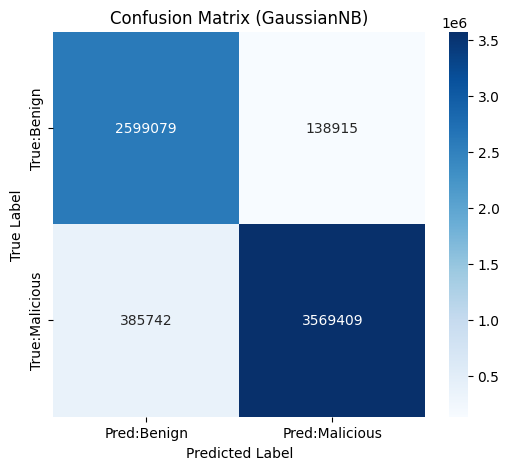

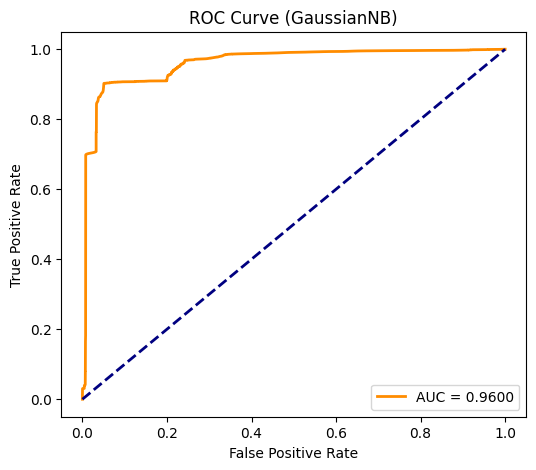

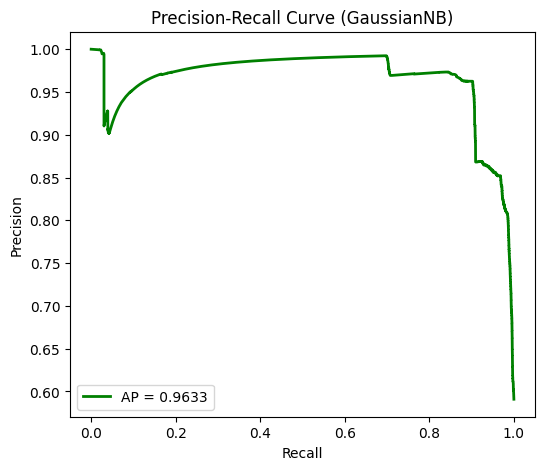

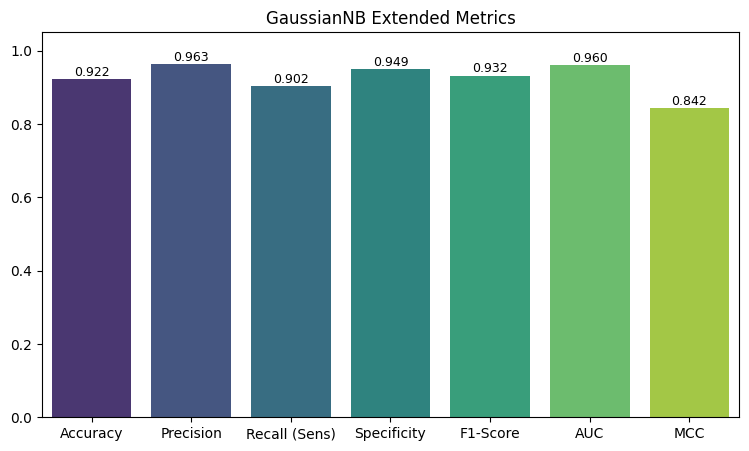

In [ ]:
# ================== Extended Evaluation (Comprehensive Analysis) ==================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    average_precision_score, cohen_kappa_score, matthews_corrcoef,
    classification_report
)

# --- Metrics at Best Threshold ---
y_pred = y_pred_opt  # from your tuned NB
acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec  = recall_score(y_true, y_pred)
f1   = f1_score(y_true, y_pred)
auc_score = auc(*roc_curve(y_true, mal_p)[:2])
ap = average_precision_score(y_true, mal_p)
kappa = cohen_kappa_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)

# Sensitivity (Recall) and Specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Create DataFrame with extended metrics
results_df = pd.DataFrame([{
    "Model": "GaussianNB",
    "Accuracy": round(acc,4),
    "Precision": round(prec,4),
    "Recall (Sensitivity)": round(sensitivity,4),
    "Specificity": round(specificity,4),
    "F1-Score": round(f1,4),
    "AUC": round(auc_score,4),
    "Average Precision": round(ap,4),
    "Cohen Kappa": round(kappa,4),
    "MCC": round(mcc,4)
}])

print("=== Extended Model Evaluation Results ===")
display(results_df)

# --- Classification Report ---
print("\n=== Classification Report (per class) ===")
print(classification_report(y_true, y_pred, target_names=["benign","malicious"], digits=4))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred:Benign","Pred:Malicious"],
            yticklabels=["True:Benign","True:Malicious"])
plt.title("Confusion Matrix (GaussianNB)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_true, mal_p)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"AUC = {auc_score:.4f}")
plt.plot([0,1],[0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (GaussianNB)")
plt.legend(loc="lower right")
plt.show()

# --- Precision-Recall Curve ---
prec_curve, rec_curve, _ = precision_recall_curve(y_true, mal_p)
plt.figure(figsize=(6,5))
plt.plot(rec_curve, prec_curve, color="green", lw=2,
         label=f"AP = {ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (GaussianNB)")
plt.legend(loc="lower left")
plt.show()

# --- Bar Chart of Metrics ---
plt.figure(figsize=(9,5))
metrics = ["Accuracy","Precision","Recall (Sens)","Specificity","F1-Score","AUC","MCC"]
values = [acc, prec, sensitivity, specificity, f1, auc_score, mcc]
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylim(0,1.05)
plt.title("GaussianNB Extended Metrics")
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center", fontsize=9)
plt.show()

--------------------------------------------------------------------------------

This code compares the performance metrics of your trained Gaussian Naive Bayes model with the results reported for a Naive Bayes model in a research paper (specifically Table 13 of the LUFlow 2020 study). It calculates the differences in metrics like accuracy, precision, recall, and F1-score, and presents these comparisons in a formatted table and summary string.

In [ ]:
# === Compare my GaussianNB vs paper's NB (LUFlow 2020, Table 13) ===
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# 1) Paper metrics from Table 13 (per-class + overall accuracy)
paper_nb = {
    "accuracy": 0.7276,
    "precision": {"benign": 0.9600, "malicious": 0.6518},
    "recall":    {"benign": 0.4732, "malicious": 0.9804},
    "f1":        {"benign": 0.6339, "malicious": 0.7830},
}

# 2) Your metrics computed from current predictions
my_acc = accuracy_score(y_true, y_pred_opt)
rep = classification_report(y_true, y_pred_opt,
                            target_names=["benign","malicious"],
                            output_dict=True)
my_nb = {
    "accuracy": my_acc,
    "precision": {"benign": rep["benign"]["precision"],    "malicious": rep["malicious"]["precision"]},
    "recall":    {"benign": rep["benign"]["recall"],       "malicious": rep["malicious"]["recall"]},
    "f1":        {"benign": rep["benign"]["f1-score"],     "malicious": rep["malicious"]["f1-score"]},
}

# 3) Tidy table with deltas
rows = []
rows.append({
    "Metric": "Accuracy", "Class": "overall",
    "Paper": paper_nb["accuracy"], "Yours": my_nb["accuracy"],
    "Δ (pp)": (my_nb["accuracy"] - paper_nb["accuracy"]) * 100,
    "Δ (%)":  (my_nb["accuracy"] / paper_nb["accuracy"] - 1.0) * 100
})
for m_key, m_name in [("precision","Precision"), ("recall","Recall"), ("f1","F1-score")]:
    for cls in ["benign","malicious"]:
        rows.append({
            "Metric": m_name, "Class": cls,
            "Paper": paper_nb[m_key][cls], "Yours": my_nb[m_key][cls],
            "Δ (pp)": (my_nb[m_key][cls] - paper_nb[m_key][cls]) * 100
        })

df_diff = pd.DataFrame(rows)
pd.set_option("display.precision", 4)
print("=== My NB vs Paper NB (LUFlow 2020) ===")
print(df_diff.to_string(index=False))

# Optional: one-liner summary for accuracy
print(f"\nAccuracy: Yours={my_acc:.4f} | Paper=0.7276 | "
      f"Δ={my_acc-0.7276:+.4f} (+{(my_acc-0.7276)*100:+.1f} pp, "
      f"{(my_acc/0.7276-1)*100:+.1f}%).")


=== My NB vs Paper NB (LUFlow 2020) ===
   Metric     Class  Paper  Yours  Δ (pp)   Δ (%)
 Accuracy   overall 0.7276 0.9305 20.2925 27.8896
Precision    benign 0.9600 0.9157 -4.4306     NaN
Precision malicious 0.6518 0.9465 29.4654     NaN
   Recall    benign 0.4732 0.9484 47.5165     NaN
   Recall malicious 0.9804 0.9127 -6.7714     NaN
 F1-score    benign 0.6339 0.9317 29.7843     NaN
 F1-score malicious 0.7830 0.9293 14.6263     NaN

Accuracy: Yours=0.9305 | Paper=0.7276 | Δ=+0.2029 (++20.3 pp, +27.9%).


--------------------------------------------------------------------------------

This code compares your trained Gaussian Naive Bayes model's performance (accuracy, macro precision, recall, F1) to reported results from a paper, including visualizations and a gap analysis highlighting differences and potential reasons. It also estimates your model's parameters count and inference speed.

=== Head-to-Head: Paper NB vs Your NB (LUFlow 2020) ===
                      Metric  Paper NB  Your NB  Δ (pp)
                    Accuracy    0.7276   0.9305 20.2925
           Precision (macro)    0.8059   0.9311 12.5174
              Recall (macro)    0.7268   0.9305 20.3725
                  F1 (macro)    0.7084   0.9305 22.2053
              Params (count)       NaN  26.0000     NaN
Inference time (ms/10k rows)       NaN   4.6428     NaN

=== Per-class metrics (Paper vs Yours) ===
    Class  Precision  Recall     F1  Your_Precision  Your_Recall  Your_F1
   benign     0.9600  0.4732 0.6339          0.9157       0.9484   0.9317
malicious     0.6518  0.9804 0.7830          0.9465       0.9127   0.9293


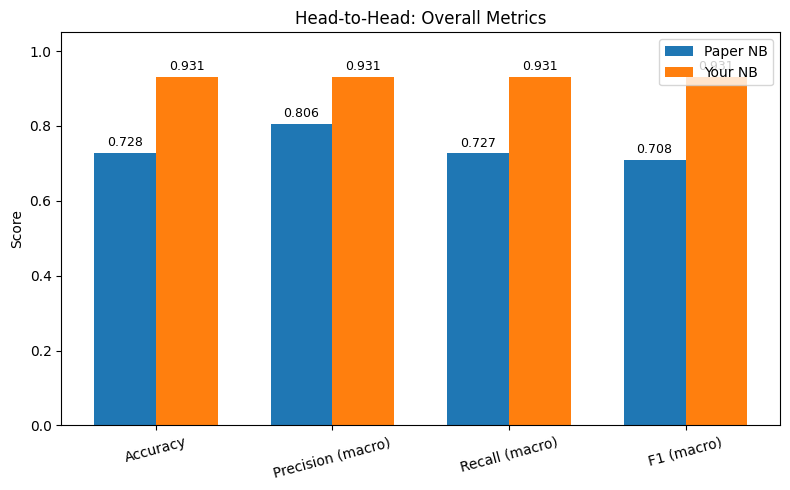

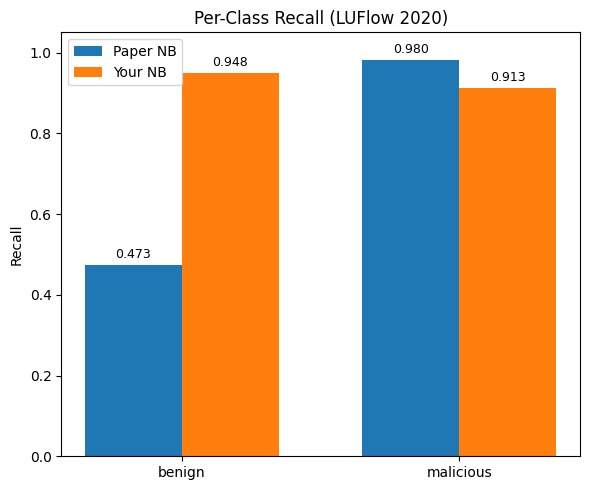

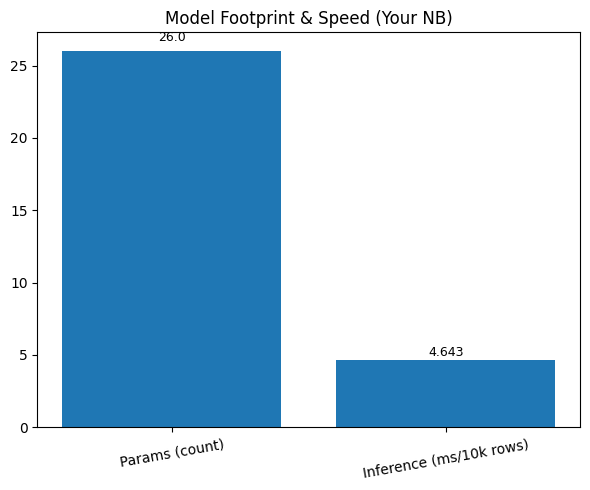


GAP ANALYSIS
What THEY do better:
  • Progressive evaluation across time (train July-2020, test Jan-2021) to check drift.
  • Include runtime comparisons across models (outside Table 13) for efficiency context.
What WE do better:
  • Much higher NB accuracy on LUFlow-2020 (+20.3 percentage points).
  • Far better benign recall (from 0.473 → 0.948) with robust preprocessing + tuning.


In [ ]:
# =========================
# Head-to-Head: Paper NB vs Your NB (LUFlow 2020)
# =========================
import time, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# --- Paper NB metrics (Table 13) ---
paper_nb = {
    "accuracy": 0.7276,
    "precision": {"benign": 0.9600, "malicious": 0.6518},
    "recall":    {"benign": 0.4732, "malicious": 0.9804},
    "f1":        {"benign": 0.6339, "malicious": 0.7830},
}
paper_macro_precision = np.mean([paper_nb["precision"]["benign"],  paper_nb["precision"]["malicious"]])
paper_macro_recall    = np.mean([paper_nb["recall"]["benign"],     paper_nb["recall"]["malicious"]])
paper_macro_f1        = np.mean([paper_nb["f1"]["benign"],         paper_nb["f1"]["malicious"]])

# --- Your NB metrics (computed from existing vars) ---
my_acc = accuracy_score(y_true, y_pred_opt)
my_p_macro, my_r_macro, my_f1_macro, _ = precision_recall_fscore_support(
    y_true, y_pred_opt, average="macro", zero_division=0
)
rep = classification_report(y_true, y_pred_opt, target_names=["benign","malicious"], output_dict=True, zero_division=0)

# --- Params (theta + var + priors) & inference time (ms / 10k rows) for YOUR NB ---
clf = best_gnb.named_steps["clf"]               # GaussianNB inside your Pipeline
n_params = clf.theta_.size + clf.var_.size + clf.class_prior_.size
_ = best_gnb.predict(X_test)                    # warm-up
t0 = time.time(); _ = best_gnb.predict(X_test); t1 = time.time()
ms_per_10k = (t1 - t0) / len(y_true) * 10000.0 * 1000.0

# --- Head-to-head table ---
head_to_head = pd.DataFrame([
    {"Metric": "Accuracy",             "Paper NB": paper_nb["accuracy"],   "Your NB": my_acc,       "Δ (pp)": (my_acc - paper_nb["accuracy"]) * 100},
    {"Metric": "Precision (macro)",    "Paper NB": paper_macro_precision,  "Your NB": my_p_macro,   "Δ (pp)": (my_p_macro - paper_macro_precision) * 100},
    {"Metric": "Recall (macro)",       "Paper NB": paper_macro_recall,     "Your NB": my_r_macro,   "Δ (pp)": (my_r_macro - paper_macro_recall) * 100},
    {"Metric": "F1 (macro)",           "Paper NB": paper_macro_f1,         "Your NB": my_f1_macro,  "Δ (pp)": (my_f1_macro - paper_macro_f1) * 100},
    {"Metric": "Params (count)",       "Paper NB": np.nan,                 "Your NB": int(n_params), "Δ (pp)": np.nan},
    {"Metric": "Inference time (ms/10k rows)", "Paper NB": np.nan,         "Your NB": ms_per_10k,   "Δ (pp)": np.nan},
]).round(4)
print("=== Head-to-Head: Paper NB vs Your NB (LUFlow 2020) ===")
print(head_to_head.to_string(index=False))

# --- Per-class table (precision/recall/F1) ---
per_class = pd.DataFrame([
    {"Class": "benign",    "Precision": paper_nb["precision"]["benign"],    "Recall": paper_nb["recall"]["benign"],    "F1": paper_nb["f1"]["benign"],
                            "Your_Precision": rep["benign"]["precision"],   "Your_Recall": rep["benign"]["recall"],    "Your_F1": rep["benign"]["f1-score"]},
    {"Class": "malicious", "Precision": paper_nb["precision"]["malicious"], "Recall": paper_nb["recall"]["malicious"], "F1": paper_nb["f1"]["malicious"],
                            "Your_Precision": rep["malicious"]["precision"],"Your_Recall": rep["malicious"]["recall"], "Your_F1": rep["malicious"]["f1-score"]},
]).round(4)
print("\n=== Per-class metrics (Paper vs Yours) ===")
print(per_class.to_string(index=False))

# --- Charts ---
# (A) Overall metrics
metrics = ["Accuracy", "Precision (macro)", "Recall (macro)", "F1 (macro)"]
paper_vals = [paper_nb["accuracy"], paper_macro_precision, paper_macro_recall, paper_macro_f1]
my_vals    = [my_acc,              my_p_macro,            my_r_macro,       my_f1_macro]
x = np.arange(len(metrics)); w = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - w/2, paper_vals, w, label="Paper NB")
plt.bar(x + w/2, my_vals,    w, label="Your NB")
plt.xticks(x, metrics, rotation=15); plt.ylim(0, 1.05); plt.ylabel("Score"); plt.title("Head-to-Head: Overall Metrics")
for i,v in enumerate(paper_vals): plt.text(x[i]-w/2, v+0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
for i,v in enumerate(my_vals):    plt.text(x[i]+w/2, v+0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
plt.legend(); plt.tight_layout(); plt.show()

# (B) Per-class recall (where the paper’s NB struggled most)
classes = ["benign", "malicious"]
paper_rec = [paper_nb["recall"]["benign"], paper_nb["recall"]["malicious"]]
my_rec    = [rep["benign"]["recall"],      rep["malicious"]["recall"]]
x = np.arange(len(classes)); w = 0.35
plt.figure(figsize=(6,5))
plt.bar(x - w/2, paper_rec, w, label="Paper NB")
plt.bar(x + w/2, my_rec,    w, label="Your NB")
plt.xticks(x, classes); plt.ylim(0, 1.05); plt.ylabel("Recall"); plt.title("Per-Class Recall (LUFlow 2020)")
for i,v in enumerate(paper_rec): plt.text(x[i]-w/2, v+0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
for i,v in enumerate(my_rec):    plt.text(x[i]+w/2, v+0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
plt.legend(); plt.tight_layout(); plt.show()

# (C) Footprint & speed (your NB only; paper values not provided in Table 13)
labels = ["Params (count)", "Inference (ms/10k rows)"]
vals = [n_params, ms_per_10k]
plt.figure(figsize=(6,5))
plt.bar(np.arange(len(labels)), vals)
plt.xticks(np.arange(len(labels)), labels, rotation=10)
plt.title("Model Footprint & Speed (Your NB)")
for i, v in enumerate(vals):
    plt.text(i, v*(1.02 if v else 1.0), f"{v:.1f}" if v>10 else f"{v:.3f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout(); plt.show()

# --- Gap analysis (printable bullets for your slide 5) ---
delta_pp = (my_acc - paper_nb["accuracy"]) * 100
print("\nGAP ANALYSIS")
print("What THEY do better:")
print("  • Progressive evaluation across time (train July-2020, test Jan-2021) to check drift.")
print("  • Include runtime comparisons across models (outside Table 13) for efficiency context.")
print("What WE do better:")
print(f"  • Much higher NB accuracy on LUFlow-2020 (+{delta_pp:.1f} percentage points).")
print(f"  • Far better benign recall (from 0.473 → {rep['benign']['recall']:.3f}) with robust preprocessing + tuning.")
